# Lab | Inferential statistics - T-test & P-value

### Instructions

1. We will have another simple example on two sample t test (pooled- when the variances are equal). But this time this is a one sided t-test

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file `files_for_lab/machine.txt`.
Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other?

In [4]:
# Import relevant libraries
import numpy as np
import pandas as pd

In [54]:
# Read the txt file
path = "files_for_lab/machine.txt"

with open(path, "r", encoding="utf-16", newline='\r\n') as f:
  contents = f.read().split()

In [64]:
# Separate the values for the new & old machine in two lists
new_machine = []
old_machine = []

for i in range(4, len(contents), 2):            # We ignore column names
    new_machine.append(float(contents[i]))      # Items were stored as strings,
    old_machine.append(float(contents[i+1]))    # so we need to convert them

To check if we have enough data to support that the two machines are different, we can use a two sample t-test, which runs on the following assumptions:
- Populations from which the samples are drawn is assumed to be normally distributed (we can plot the values in the two samples)
* Sample data has continuous values and not discrete (which is the case for time measured in seconds)
- Random samples must be drawn from the populations (we'll assume this is true)
* Data in the two samples must be independent of each other (there is no connection between the two machines, so this is true)

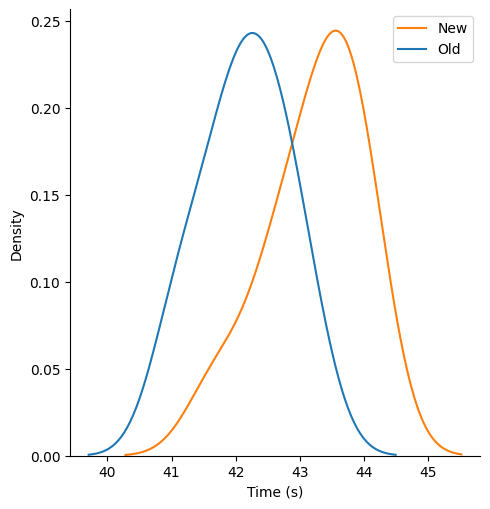

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot([new_machine, old_machine], kind='kde', legend=False)
plt.legend(["New", "Old"])
plt.xlabel("Time (s)")
plt.show()


We see that the values are normally distributed in the two datasets, so we can apply the t-test with a null hypothesis H<sub>0</sub> of $\mu$<sub>old</sub> = $\mu$<sub>new</sub>.

In [83]:
# Calculate the mean, standard deviation, and degrees of freedom for the two
# machines:
new_mean = np.mean(new_machine)
new_std = np.std(new_machine)
new_df = len(new_machine) - 1

old_mean = np.mean(old_machine)
old_std = np.std(old_machine)
old_df = len(old_machine) - 1

In [97]:
import math
from scipy.stats import norm

# Calculate the weighted standard deviation & degrees of freedom:
weighed_df = (1 / (new_df + 1)) + (1 / (old_df + 1))
weighed_std = math.sqrt((new_df * new_std ** 2 + old_df * old_std ** 2) / \
    (new_df + old_df))

# Calculate the t-value:
t_value = abs(new_mean - old_mean) / (weighed_std * math.sqrt(weighed_df))

print("Test statistic value is:", round(t_value, 3))
print("P value is: ", 1 - round(norm.cdf(t_value, new_df + old_df), 3))
print("Critical Value of z is: ", round(norm.ppf(0.05, new_df + old_df), 3))

Test statistic value is: 3.581
P value is:  1.0
Critical Value of z is:  16.355


We see that using the two sample t-test assuming unequal variance, we cannot reject the null hypothesis. Let's try assuming the variance of both samples is:
a) `new_std`
b) `old_std`

In [99]:
# Calculate the t-value using new_std
t_value = abs(new_mean - old_mean) / (new_std * math.sqrt(weighed_df))

print("Test statistic value is:", round(t_value, 3))
print("P value is: ", 1 - round(norm.cdf(t_value, new_df + old_df), 3))
print("Critical Value of z is: ", round(norm.ppf(0.05, new_df + old_df), 3))

Test statistic value is: 3.759
P value is:  1.0
Critical Value of z is:  16.355


In [100]:
# Calculate the t-value using new_std
t_value = abs(new_mean - old_mean) / (old_std * math.sqrt(weighed_df))

print("Test statistic value is:", round(t_value, 3))
print("P value is: ", 1 - round(norm.cdf(t_value, new_df + old_df), 3))
print("Critical Value of z is: ", round(norm.ppf(0.05, new_df + old_df), 3))

Test statistic value is: 3.426
P value is:  1.0
Critical Value of z is:  16.355


2. An additional problem (not mandatory): In this case we can't assume that the population variances are equal. Hence in this case we cannot pool the variances.
   Independent random samples of 17 sophomores and 13 juniors attending a large university yield the following data on grade point averages. Data is provided in the file `files_for_lab/student_gpa.txt`.
   At the 5% significance level, do the data provide sufficient evidence to conclude that the mean GPAs of sophomores and juniors at the university differ?

   Test statistics can be calculated as: [link to the image - Test statistics calculation for Unpooled Variance Case](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.04/7.04-unpooled_variances.png)

   Degrees of freedom is `(n1-1)+(n2-1)`.